In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import mapping
import argparse
from pyDepfetReader import FileReader
from epics_utils import get_pv

max_row = 768
max_col = 256


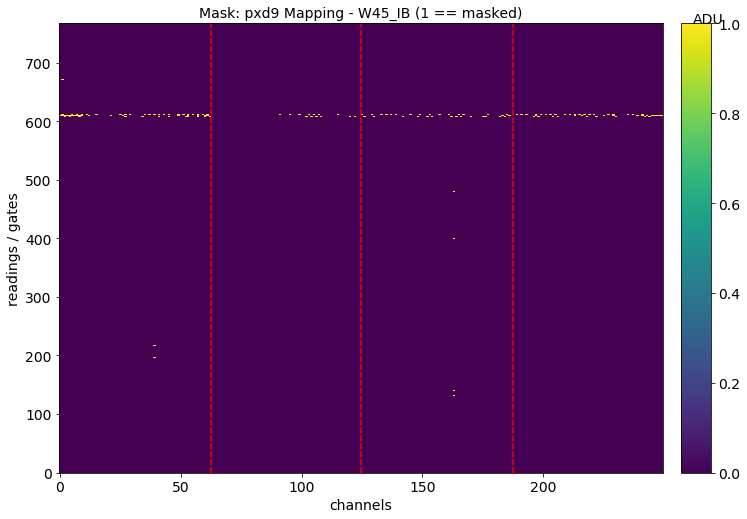

In [91]:
# hitmap

from zs_data_utils import get_hot_pixels
import plots
import glob

gcr_path = '/data/commissioning/runs/all/EXP0012/'
gcr_runs = [334]
#gcr_runs = [334,335,336,337,338,348,349,350,351,352,353,359,360]

dhe = 'H1022'
asicpair = 0
threshold = 0.00005

device = get_pv("PXD:B:config-"+dhe,"device_config:VALUE:set").get()
module = get_pv("PXD:B:config-"+dhe,"device_module:VALUE:set").get()
module_type = get_pv("PXD:B:config-"+dhe,"module_type:VALUE:set").get()

for run in gcr_runs:
    rundata = os.path.join(gcr_path, 'Run%04d-0.dat'%run)
    #rundata = glob.glob(os.path.join(gcr_path, 'Run%04d-*.dat'%run))
    
    if not os.path.isfile(rundata):
        print(rundata, 'not exist.')
        continue
    
    pixel_masks_merged, hits_per_pixel_unmasked, events_per_pixel_masked = get_hot_pixels(rundata, dhe, asicpair, threshold)
    
    #print(np.transpose(np.where(hits_per_pixel_unmasked>0)))
    mask = np.ma.array(np.zeros((768, 256)), mask=pixel_masks_merged[:, :, 0], fill_value=255, dtype=np.uint8).filled()
    
    fig = plots.plot_mask(mask=mask, device=device, module=module, module_type=module_type, asicpair=asicpair)
    #fig.axes[0].set_ylim(600,650)

electrical format  (768, 256)
pxd9 format  (768, 250)
non-zero pixels occ 0.00342708333333
pxd9 ASIC 0 [3, 197, 217, 385, 604, 607, 608, 609, 610, 611, 665, 671]
pxd9 ASIC 1 [1, 604, 607, 608, 609, 611]
pxd9 ASIC 2 [3, 132, 140, 324, 400, 480, 604, 607, 608, 609, 610, 611]
pxd9 ASIC 3 [1, 604, 607, 608, 609, 610, 611]
<type 'float'>


(603.5, 612.5)

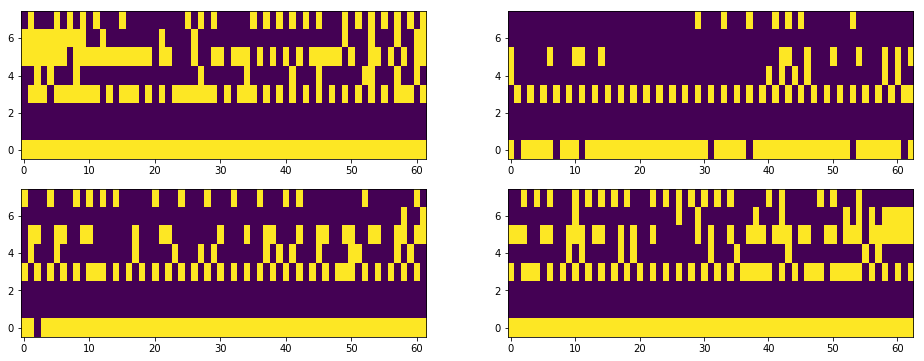

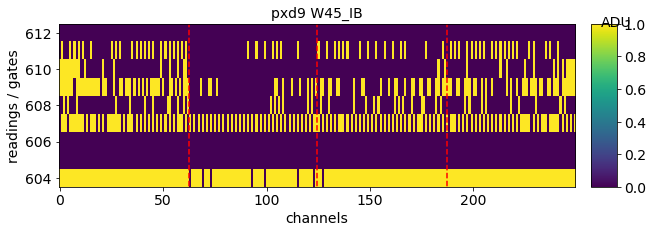

In [140]:
#idx = np.transpose(np.where(hits_per_pixel_unmasked))

fig, axes = plt.subplots(2,2,figsize=(16,6))

#im = axes[0,0].imshow(mask, interpolation="none", origin="lower", aspect="auto")
#cbar = plt.colorbar(im)
#cbar.ax.set_ylim(0,1)
#cbar.ax.set_ylabel('ADU', rotation=270)

mask2 = np.copy(mask)
print( 'electrical format ', mask2.shape)
#mask2[156:160,:]=1
grids = mapping.mapper("pxd9",module_type,asicpair=asicpair).raw(mask2)
print( 'pxd9 format ', grids.shape)

import sys
np.set_print(options(threshold=sys.maxint)

print( 'non-zero pixels occ', len(np.transpose(np.where(grids>0)))/(768.*250.))
for i in range(4):
    print( 'pxd9 ASIC %u'%i,sorted(set(np.where(grids[:,i*64:(i+1)*64]>0)[0])))

print( type(round(62.5)))

for i in range(4):
    #axes[i/2,i%2].imshow(mask2[150:170,i*64:(i+1)*64], interpolation="none", origin="lower", aspect="auto")
    axes[i/2,i%2].imshow(grids[604:612,int(np.floor(i*62.5)):int(np.floor((i+1)*62.5))], interpolation="none", origin="lower", aspect="auto")


fig2 = plt.figure(figsize=(10,3))
plots.plot_occupancyXY(mask2, fig2.add_subplot(111), format='pxd9',device=device, module=module, module_type=module_type, asicpair=asicpair, 
                       title='pxd9 %s'%module,vmin=0.0, vmax=1.0)
fig2.axes[0].set_ylim(603.5,612.5)



In [244]:
#PyDepfetReader 

reader = FileReader(-1,0)
reader.set_debug_output(False)
reader.return_time = True

occ=[]
evt=[]
for run in gcr_runs:
    rundata = os.path.join(gcr_path, 'Run%04d-0.dat'%run)
    #rundata = glob.glob(os.path.join(gcr_path, 'Run%04d-*.dat'%run))
    
    if not os.path.isfile(rundata):
        print( rundata, 'not exist.')
        continue
        
    reader.open(rundata)
    
    Nframes = reader.getNumberOfFrames()
    print( rundata, Nframes)
    
    for idx,event in enumerate(reader):
        if idx%200 !=0: continue
        #if idx>10000: break
            
        for [i_dhe,data,raw,dac] in event:
            if i_dhe != 'H1022':
                continue

            ## exclude hits in the last gate. 
            #nhits = 0
            #for hit in data:
            #    if hit[1]<764:
            #        nhits+=1
            #if nhits>0:print( idx, nhits, nhits/20.)
            #occ.append(nhits/192000.*100)
            occ.append(len(data)/192000.*100)
            evt.append(idx)
            
print( 'done')

/data/commissioning/runs/all/EXP0012/Run0334-0.dat 1069903
done


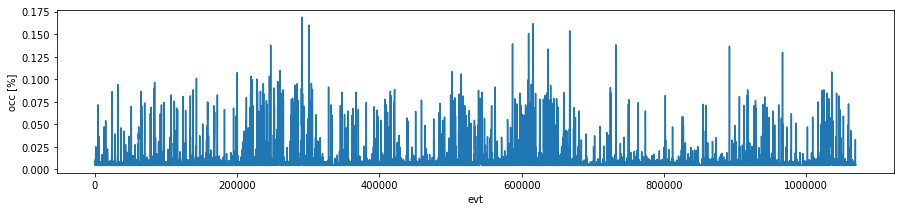

In [245]:
plt.figure(figsize=(15,3))
plt.plot(evt,occ)
#plt.plot(evt[0:1000],occ[0:1000])
plt.xlabel('evt')
plt.ylabel('occ [%]')

#for i in range(len(evt)):
#    if occ[i]>0.0027:
#        print('%.5f, %u'%(occ[i],evt[i]))
        
plt.show()


In [284]:
reader = FileReader(-1,0)
reader.set_debug_output(False)
reader.return_time = True

hitmaps=[]

for run in gcr_runs:
    rundata = os.path.join(gcr_path, 'Run%04d-0.dat'%run)
    #rundata = glob.glob(os.path.join(gcr_path, 'Run%04d-*.dat'%run))
    
    if not os.path.isfile(rundata):
        print(rundata, 'not exist.')
        continue
        
    reader.open(rundata)
    
    Nframes = reader.getNumberOfFrames()

    Nframes = 100000
    interval = 5000
    for i in range(Nframes/interval+1):
        hitmaps.append(np.zeros((max_row, max_col)))        
    print(rundata, Nframes, len(hitmaps))
    
    i_inter = 0
    for idx,event in enumerate(reader):
        #if idx%100 !=0: continue
        if idx>Nframes: break
        
        i_inter = int(idx/interval)
        
        # each hitmaps accumulated 10 events.
        if idx - i_inter*interval >10:
            continue
            
        for [i_dhe,data,raw,dac] in event:
            if i_dhe != 'H1022':
                continue
            for hit in data:
                hitmaps[i_inter][hit[1]][hit[0]] += 1

for i in range(len(hitmaps)):
    print(i, len(np.transpose(np.where(hitmaps[i]>0))))

/data/commissioning/runs/all/EXP0012/Run0334-0.dat 100000 21
0 175
1 117
2 60
3 153
4 46
5 20
6 18
7 22
8 50
9 34
10 36
11 14
12 32
13 162
14 162
15 177
16 189
17 67
18 58
19 30
20 8


21


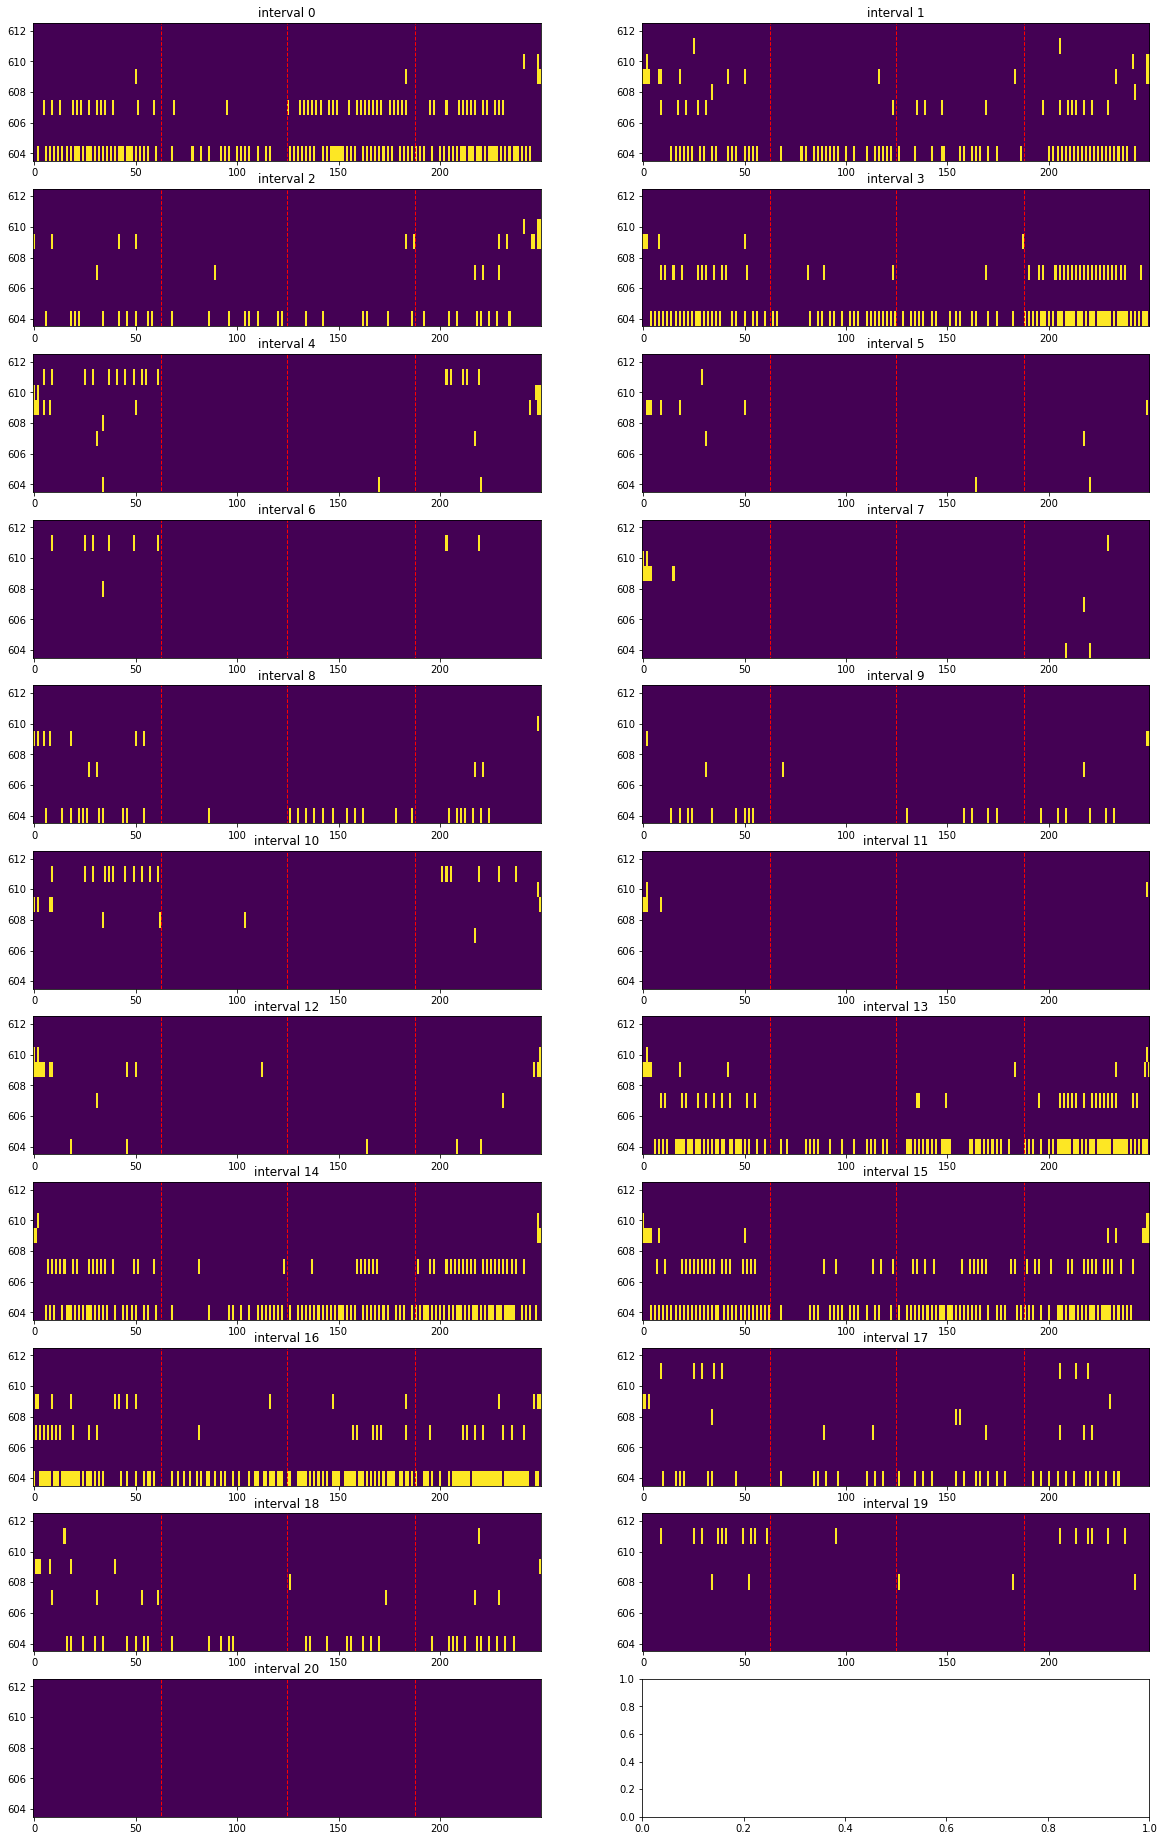

In [285]:
nrows = int(np.ceil(len(hitmaps)/2.))

fig2, axes = plt.subplots(nrows,2,figsize=(20,3*nrows))

print(len(hitmaps))

grids = [mapping.mapper("pxd9",module_type,asicpair=asicpair).raw(hitmap) for hitmap in hitmaps]

for idx in range(len(hitmaps)):
    #print(idx, len(np.transpose(np.where(hitmaps[idx]>0))))
    #plots.plot_occupancyXY(hitmaps[idx], axes[idx], format='pxd9',device=device, module=module, module_type=module_type, asicpair=asicpair, title='interval %s'%idx,vmin=0.0, vmax=1.0, colorbartext="")
    
    axes[idx/2,idx%2].imshow(grids[idx], vmin=0, vmax=1, interpolation="none", origin="lower", aspect="auto")
    axes[idx/2,idx%2].set_ylim(603.5,612.5)
    axes[idx/2,idx%2].set_title('interval %s'%idx)
    
    space=[62.5, 124.5, 187.5]
    for line in space:
        axes[idx/2,idx%2].plot([line, line], [0, grids[idx].shape[0]-0.5], 'r--', lw=1)
#plt.show()

In [289]:
# hitmap

from zs_data_utils import get_hot_pixels
import plots
import glob

gcr_path = '/data/commissioning/runs/all/EXP0012/'
#gcr_runs = [334,335,336,337,338,348,349,350]
gcr_runs = [334,335,336,337,338,348,349,350,351,352,353,359,360]

dhe = 'H1022'
asicpair = 0
threshold = 0.00005

device = get_pv("PXD:B:config-"+dhe,"device_config:VALUE:set").get()
module = get_pv("PXD:B:config-"+dhe,"device_module:VALUE:set").get()
module_type = get_pv("PXD:B:config-"+dhe,"module_type:VALUE:set").get()


hitmaps =[np.zeros((max_row, max_col)) for i in range(len(gcr_runs))]

for idx, run in enumerate(gcr_runs):
    rundata = os.path.join(gcr_path, 'Run%04d-0.dat'%run)
    #rundata = glob.glob(os.path.join(gcr_path, 'Run%04d-*.dat'%run))
    
    if not os.path.isfile(rundata):
        print(rundata, 'not exist.')
        continue
    
    print(rundata, dhe)
    
    pixel_masks_merged, hits_per_pixel_unmasked, events_per_pixel_masked = get_hot_pixels(rundata, dhe, asicpair, threshold)
    #pixel_masks_merged, hits_per_pixel_unmasked, events_per_pixel_masked = get_hot_pixels(rundata, dhe, asicpair, mask_window=100000, threshold)

    
    #print(np.transpose(np.where(hits_per_pixel_unmasked>0)))
    mask = np.ma.array(np.zeros((768, 256)), mask=pixel_masks_merged[:, :, 0], fill_value=255, dtype=np.uint8).filled()
    
    hitmaps[idx] = mapping.mapper("pxd9",module_type,asicpair=asicpair).raw(mask)
    

/data/commissioning/runs/all/EXP0012/Run0334-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0335-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0336-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0337-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0338-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0348-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0349-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0350-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0351-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0352-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0353-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0359-0.dat H1022
/data/commissioning/runs/all/EXP0012/Run0360-0.dat H1022


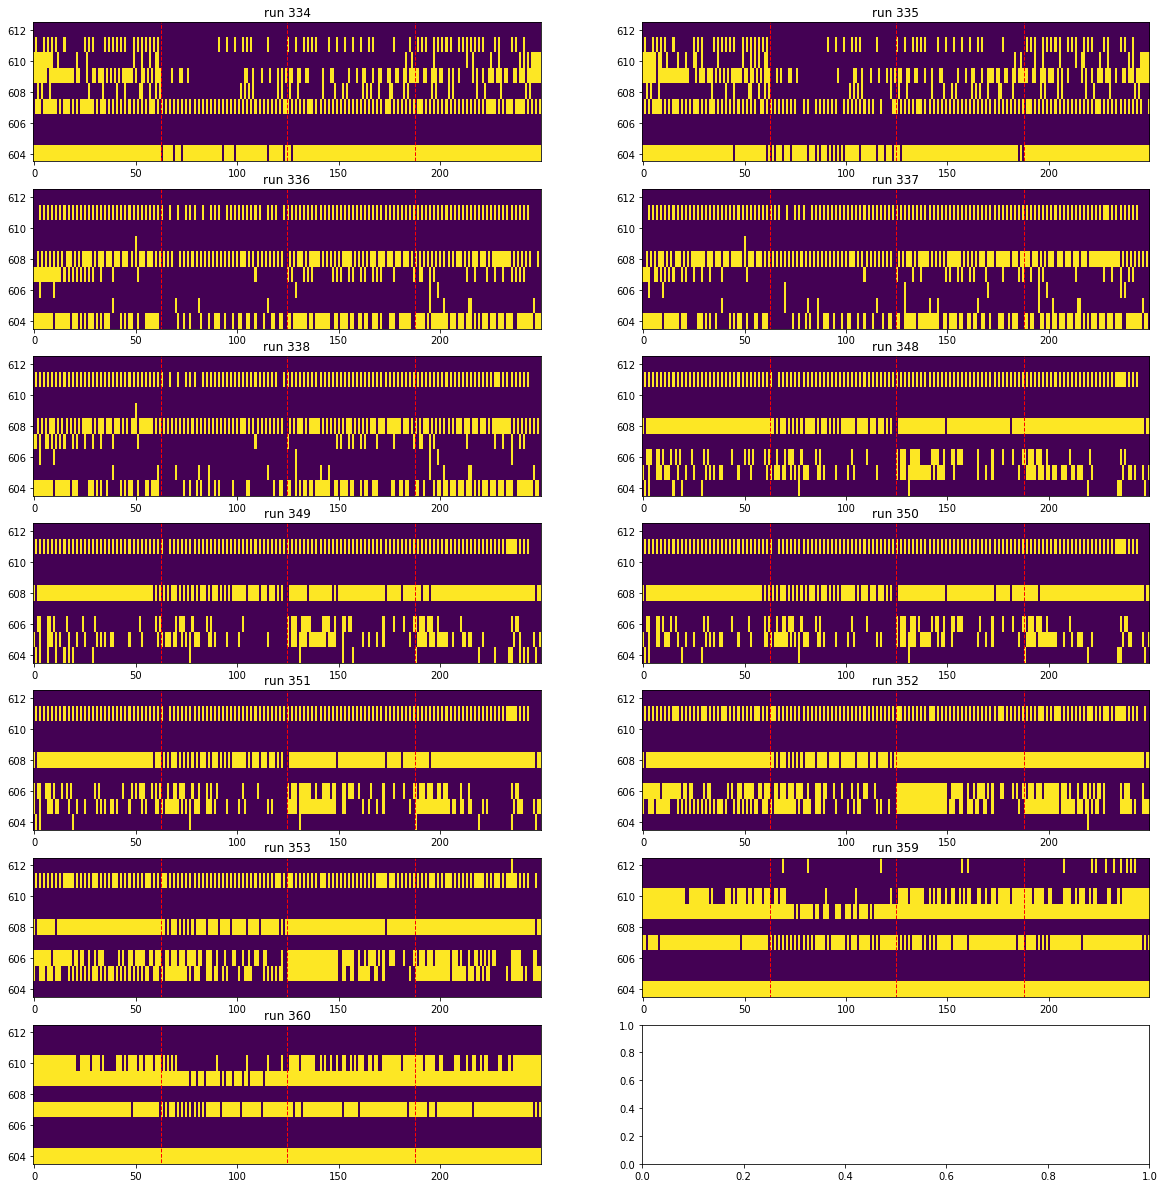

In [288]:
nrows = int(np.ceil(len(gcr_runs)/2.))
fig, axes = plt.subplots(nrows,2,figsize=(20,3*nrows))

for idx, run in enumerate(gcr_runs):
    
    axes[idx/2,idx%2].imshow(hitmaps[idx], vmin=0, vmax=1, interpolation="none", origin="lower", aspect="auto")
    axes[idx/2,idx%2].set_ylim(603.5,612.5)
    axes[idx/2,idx%2].set_title('run %s'%run)
    
    space=[62.5, 124.5, 187.5]
    for line in space:
        axes[idx/2,idx%2].plot([line, line], [0, grids[idx].shape[0]-0.5], 'r--', lw=1)
    
    #fig = plots.plot_mask(mask=mask, device=device, module=module, module_type=module_type, asicpair=asicpair)
    #fig.axes[0].set_ylim(600,650)